In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from numpy.linalg import inv
from numpy.linalg import det
from numpy.linalg import eig
from PIL import Image
from numpy import asarray 
import sys
import math

# Training the DataSet

In [3]:
path1 = 'data/ORL/s'
path2 = '/'
path3 = '.pgm'

In [4]:
data = np.ndarray(shape=(240 , 10304), dtype=np.int64)
data = pd.DataFrame(data)

### Creating the Training DB

In [5]:
#taking 60% as Data Training set and remaining 40% as testing data set
count = 0
for i in range(40):
    for j in range(6):
        path = path1 + str(i+1) + path2 + str(j+1) + path3
        image = asarray(Image.open(path))
        image  = np.reshape(image , (1 , image.shape[0]*image.shape[1] ))
        data.iloc[count , :] = image
        count = count + 1

### Column Wise Mean


In [6]:
mean_data = np.ndarray(shape = (1 , 10304), dtype = np.int64)
for i in range(10304):
    mean_data[0][i] = data.iloc[: , i].mean()

In [7]:
data = data.to_numpy()

### Mean allign Data

In [8]:
normal_data = np.ndarray(shape = (240 , 10304) , dtype = np.int64)

In [9]:
for i in range(240):
    normal_data[i][:] = np.subtract(data[i][:] , mean_data)

In [14]:
cov_matrix = np.matmul(normal_data , np.transpose(normal_data)) / (240)
cov_matrix

array([[ 62261.92083333,  29438.125     ,  41600.79166667, ...,
         -8545.66666667,   8753.51666667,   2161.40416667],
       [ 29438.125     , 111134.70833333,  46255.00416667, ...,
         14080.6875    ,  14266.07916667,  14041.725     ],
       [ 41600.79166667,  46255.00416667,  83354.45      , ...,
          7037.17083333,  11743.475     ,  12546.54583333],
       ...,
       [ -8545.66666667,  14080.6875    ,   7037.17083333, ...,
         59092.53333333,  13765.76666667,  19906.4       ],
       [  8753.51666667,  14266.07916667,  11743.475     , ...,
         13765.76666667,  45608.65416667,  16562.17916667],
       [  2161.40416667,  14041.725     ,  12546.54583333, ...,
         19906.4       ,  16562.17916667,  52526.45833333]])

### Computing the Eigen Values and Eigen Vectors

In [15]:
eig_values , eig_vectors = np.linalg.eig(cov_matrix)

In [16]:
eig_vectors = np.transpose(eig_vectors)

### Sort the Eigen Vectors based upon the eigen Values

In [17]:
eig_vals_sorted = np.sort(eig_values)[::-1]
eig_vecs_sorted = eig_vectors[:, eig_values.argsort()]

### Creating the Testing Face DB

In [18]:
testing_data = np.ndarray(shape = (160 , 10304) , dtype = np.int64)
testing_data = pd.DataFrame(testing_data)
#taking 60% as Data Training set and remaining 40% as testing data set
count = 0
for i in range(40):
    for j in range(4):
        path = path1 + str(i+1) + path2 + str(j+7) + path3
        image = asarray(Image.open(path))
        image  = np.reshape(image , (1,10304))
        testing_data.iloc[count , :] = image
        count = count + 1

### Euclidien Distance Classifier

In [19]:
def euclidien_distance(a , b):
    dist = 0
    for i in range(k):
        dist += (a[0][i] - b[i])**2
    return dist**0.5  

### Create a Feature Vector ( For Different K Values )

In [33]:
accuracy = []
k_values = []
for k in range(2 , 240 , 2):
    k_values.append(k)
    #==========Feature Vector Representation==========#
    
    feature_vector = np.ndarray(shape = (240 , k))
    feature_vector = eig_vecs_sorted[: , 0:k]
    
    #==========Eigen Faces Computation================#
    
    eigen_faces = np.ndarray(shape = (k , 10304) , dtype = np.int64)
    eigen_faces = np.dot(np.transpose(feature_vector) , normal_data)
    
    #========== Signature Face Computation============#
    
    signature_faces = np.ndarray(shape = (240 , k) , dtype = np.int64)
    for i in range(240):
        signature_faces[i] = np.dot(normal_data[i]  , np.transpose(eigen_faces))
    correct = 0
    #=========== Testing All Faces (For accuracy Calculation)=========#
    for j in range(160):
        # ======= Mean Align the test data=========#
        
        test = np.array(testing_data.iloc[j,:])
        mean_test = test - mean_data
        
        #======== Project the Test image on the Eigen Faces======#
        
        projected_face = np.ndarray(shape = (1,k) , dtype = np.int64)
        projected_face = np.dot(mean_test , np.transpose(eigen_faces))
        
        # Assign initially the maximum value of the system as the distance and later find the minimum distance
        minimum = sys.maxsize
        #Assume match is 0 face
        match = 0
        #Calculate the Euclidien Distance of the current test image( projected ) with all the eigen faces
        for l in range(240):
            dist = euclidien_distance(projected_face , signature_faces[l])
            #if the Least distance is coming from suppose ith vector , the corresponing ith image in the original train db is the related face 
            if(dist < minimum):
                match = l
                minimum = dist
            if( ( math.floor(j/6)) == ( math.floor(match/6) ) ):
                correct = correct + 1   
    accuracy.append(correct)

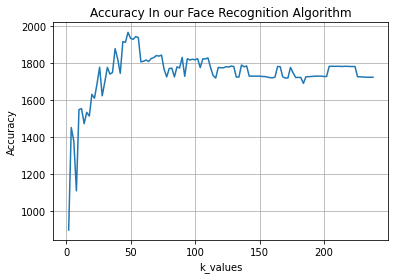

In [34]:
fig, ax = plt.subplots()
ax.plot(k_values, accuracy)
ax.set(xlabel='k_values', ylabel='Accuracy', title='Accuracy In our Face Recognition Algorithm')
ax.grid()
plt.show()